## Приложение 2. Демонстрация работы программы

### Часть 1. Генератор ключей

In [1]:
# Сначала очистим директорию от артифактов предыдущих запусков кода

!rm -f encrypted.* decrypted.* *.public *.secret
!ls -l

total 1160
-rw-r--r-- 1 evgeny evgeny 432799 Apr 25 17:03 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny  88091 Apr 25 17:05 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny 306562 Apr 25 16:42 mayday.png
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [2]:
# Запускаем генерацию ключевой пары
# Скрипт по-умолчанию создаёт пару ключей с названиями "key.pub" 
# и "key.secret", или можно напрямую передать скрипту префикс и 
# получить пару ключей с другими названиями

# Генератор ключевой пары принимает два парметра p_size и q_size
# Чтобы соблюсти условие значительной величины их разницы - 
# задам им разную длину

from keygen import KeyGenerator

KeyGenerator(1024, 3072)

# Проверим создались ли файлы с ключами
!ls -l

total 1168
-rw-r--r-- 1 evgeny evgeny 432799 Apr 25 17:03 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny  88091 Apr 25 17:05 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny   1541 Apr 25 17:05 key.public
-rw-r--r-- 1 evgeny evgeny   2053 Apr 25 17:05 key.secret
-rw-r--r-- 1 evgeny evgeny 306562 Apr 25 16:42 mayday.png
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [3]:
# Посмотрим содержимое key.pub
# Файл содержит строки в 16-м формате со значением 
# e (открытый ключ) и n (модуль) разделенные знаком /

!cat key.pub

cat: key.pub: No such file or directory


In [4]:
# Посторим файл key.secret
# Файл содержит строки в 16-м формате со значением 
# d (закрытый ключ) и n (модуль) разделенные знаком /

!cat key.secret

0X15971E2D9CA67D18B9B9D8F722F5744C04BDAA4FF8A5C22B363FB2CFEF8E2B7A19F5BD744B6726853FBFAAED45739CBE55AC25C3B2C37A8F9A99488604447389BF6AB651BB26CAE65B374921062994385A0FC7F05FA6EFD6F5CB898E28F0D12E5C93C2CC5874585568E8618F1C9EAB658A2F86DDE7A12E13AD82A55CA39B1D404D9C0139151AD46A313F5A4BB996D91B22F50234CFCD0E9FCAC6F9FFA38F39040C8974ABD70D744099D96DDB1E61AC4DF80CC7BD8ADAF774D132707C5CBC38C1AC340F5521A88B21D0E330399B398DF7BBDBD70D6BFF036CD6B5013AA4148CEDA3523FFE9EF71117910A502D8B85582AB24FDCFAEEA22AC8899F1DE90C5D346E66AE71655F71945CFC6FC153A668A5B8C60E58B33A0EB86B42F8548130BC94CA82B28A0B1B11F187A47C2DB737F6E6B309BCA306894AE54BBD81F6196500A12FE06D855278325DB5F51498F651CC558FA5AFB2615AD0847FDFA3AD30375AE0FB26E1208B6128ED625EF34D4520F61EE4E42EF7D602FDB89CCF5E5E70B2A03A725EEAE43510B9E64B0747C9B669014A0BE66ED648F6AAA6ECCE91B5F63DB61CDE335D6D9F8F0762967C72EA820DBECBE01B8C3F534F76EDD9FFE5F81846737FBEF4A78DEB6ED25A322588E3A7544C775B783E460A4EC721FB81DDC439C67E6BCED7C73EDF1F41DBDF11535BA533EEC35B9B698B

In [5]:
# Создам объект класса RSA для шифрования файлов и 
# передам ему ключ для шифрования (открытый)

from rsa import RSA

encryptor = RSA(public_key_path="key.public")
encryptor

In [6]:
# Для наглядности вывожу в строчном представлении 
# модели и её основные параметры. Видим что объект 
# класса обладает только ключами для зашифрования

encryptor.__str__()

{'public_key': '0X9BFA4C04A772DD0CD052F930680FB65DC1AB85954C4284DDF9571AD8EBEBBEA3F82DC6B4CA1FDECA0A033941F40537E453550B41A3C241BD0D2A8C07C9E518EFF90E6CCA816FACD93EDD8E178631270037BB6D4162472BF123FB0C110A8F40367B934D51EF85E94E0FD2B2AF71CF119A78633F95E6C64F832A150A5CE7C323CC7E32B25279F7D5329FA6E01E7BF87AB17AE53E78B46E832CB9E547667EF74783D2CEBD239C9B47B1AB6999BFFB9415F1959B018E0A6288003C1CF0945AFFDCA9981CED090EDA9EE6AA94E39ECA4C5B6D45B092ACE92E0619B48F93E8D97484D05E1FE1D692B90572F4D3826B0BC31E7FE6F3A48B759D325CDBA0A68F0F41DD3B',
 'public_key_int': 1969036329397043498213265114496828729499735021098414470812166709210836169348808860211183665749694090547378452524070629085864989108229668089071652104953456751101723595021704282076617594829037031147665460924877821205608220222516527951817068412875429030686254024450236182319361416025007699883099461794377630167419245284949230947845366377281271930488665305584589960433926859445741365165482532637717991467906367316065206504940241563029553543724583669870

In [7]:
# Создам отдельный объект для расштфрования и 
# передам ему закрытый ключ

decryptor = RSA(secret_key_path="key.secret")
decryptor

In [8]:
# Также пристально посмотрим на объект через специальный метод
# Этот объект напротив - содержит лишь ключи для расшифрования
# Таким образом можно ограничить функциональность класса просто 
# передав или не передавая ей нужные данные. 

decryptor.__str__()

{'public_key': None,
 'public_key_int': None,
 'public_key_size': None,
 'secret_key': '0X15971E2D9CA67D18B9B9D8F722F5744C04BDAA4FF8A5C22B363FB2CFEF8E2B7A19F5BD744B6726853FBFAAED45739CBE55AC25C3B2C37A8F9A99488604447389BF6AB651BB26CAE65B374921062994385A0FC7F05FA6EFD6F5CB898E28F0D12E5C93C2CC5874585568E8618F1C9EAB658A2F86DDE7A12E13AD82A55CA39B1D404D9C0139151AD46A313F5A4BB996D91B22F50234CFCD0E9FCAC6F9FFA38F39040C8974ABD70D744099D96DDB1E61AC4DF80CC7BD8ADAF774D132707C5CBC38C1AC340F5521A88B21D0E330399B398DF7BBDBD70D6BFF036CD6B5013AA4148CEDA3523FFE9EF71117910A502D8B85582AB24FDCFAEEA22AC8899F1DE90C5D346E66AE71655F71945CFC6FC153A668A5B8C60E58B33A0EB86B42F8548130BC94CA82B28A0B1B11F187A47C2DB737F6E6B309BCA306894AE54BBD81F6196500A12FE06D855278325DB5F51498F651CC558FA5AFB2615AD0847FDFA3AD30375AE0FB26E1208B6128ED625EF34D4520F61EE4E42EF7D602FDB89CCF5E5E70B2A03A725EEAE43510B9E64B0747C9B669014A0BE66ED648F6AAA6ECCE91B5F63DB61CDE335D6D9F8F0762967C72EA820DBECBE01B8C3F534F76EDD9FFE5F81846737FBEF4A78DEB6ED25A

In [9]:
# Хотя можно было все сделать одним объектов 
# просто передав ему оба ключа

rsa = RSA(public_key_path="key.public", secret_key_path="key.secret")
rsa.__str__()

{'public_key': '0X9BFA4C04A772DD0CD052F930680FB65DC1AB85954C4284DDF9571AD8EBEBBEA3F82DC6B4CA1FDECA0A033941F40537E453550B41A3C241BD0D2A8C07C9E518EFF90E6CCA816FACD93EDD8E178631270037BB6D4162472BF123FB0C110A8F40367B934D51EF85E94E0FD2B2AF71CF119A78633F95E6C64F832A150A5CE7C323CC7E32B25279F7D5329FA6E01E7BF87AB17AE53E78B46E832CB9E547667EF74783D2CEBD239C9B47B1AB6999BFFB9415F1959B018E0A6288003C1CF0945AFFDCA9981CED090EDA9EE6AA94E39ECA4C5B6D45B092ACE92E0619B48F93E8D97484D05E1FE1D692B90572F4D3826B0BC31E7FE6F3A48B759D325CDBA0A68F0F41DD3B',
 'public_key_int': 1969036329397043498213265114496828729499735021098414470812166709210836169348808860211183665749694090547378452524070629085864989108229668089071652104953456751101723595021704282076617594829037031147665460924877821205608220222516527951817068412875429030686254024450236182319361416025007699883099461794377630167419245284949230947845366377281271930488665305584589960433926859445741365165482532637717991467906367316065206504940241563029553543724583669870

In [10]:
# Проверим правильность работы ключей у объектов encrypted 
# и decrypted. Сгенерируем случайное число и зашифруем а 
# затем расшифруем их

import random

_int = random.randrange(2, 100)

encr = pow(_int, encryptor.public_key_int, encryptor.module_int)
decr = pow(encr, decryptor.secret_key_int, decryptor.module_int)

bool(decr == _int)

True

In [11]:
# Проделаем то же самое с объектом rsa чтобы подтвердить 
# корректность суждений

_int = random.randrange(2, 100)

encr = pow(_int, rsa.public_key_int, rsa.module_int)
decr = pow(encr, rsa.secret_key_int, rsa.module_int)

bool(decr == _int)

True

### Часть 2. Зашифрование и расширование

In [12]:
# Для демонстрации зашифрования и расшифрования мною были 
# подготовлены два файла с тескстом open.txt и изображением 
# image.png

# Передам методу encrypt относительный путь к файлу для 
# зашифрования и название файлы куда дб записан зашифрованый 
# файл encrypted.txt

rsa.encrypt("open.txt", "encrypted.txt")

In [13]:
# Попробуем прочитать зашифрованый файл

!cat encrypted.txt

g����A�W7L�$W)��ʏ'�@߹3�2�A��x
��:��Q<��F^��!�ZԚH�g|Ȩ���[Dv�����l9�xLE�������U�^[�<M�hfkH62���.]rL	�D������f�_������Ujұ��
��[DH<��hwi�ЎX2�~�c��I+�c=�@���3�'��?f��`|���,xP�s�ޜk�H|���1�.�,��s�(�^�]�`c�
닆�+8�˶+NpG �1����'=f��b���A��&�?9ɍ`|F��99��#ij�g��i�0.(q�_�5��G�|P�T����j��*�\�z�2��좃�%�iր6�ѧvϏ�~1�9y�[5	���.�H���ԔAN�;�O�Ƕ��x��Ԭ�  q��-*�tV`���Խ��7՝�y��	9��9~e�y��Iڣ|K�p�T�X��[;>�f*���V`!i�d���g��s�(�aֆs5	��R

In [14]:
# Передам методу decrypt относительный путь к файлу для 
# расшифрования и название файлы куда дб записан расшифрованый 
# файл decrypted.txt

rsa.decrypt("encrypted.txt", "decrypted.txt")

In [15]:
!cat decrypted.txt

Прощай немытая Россия,
Страна рабов, страна господ,
И вы, мундиры голубые,
И ты, им преданный народ.

Быть может, за стеной Кавказа
Сокроюсь от твоих пашей,
От их всевидящего глаза,
От их всеслышащих ушей.

Михаил Лермонтов, 1841г.

In [16]:
# Проверим корректность расшифровки

with open("open.txt", "rb") as file:
    open_text = file.read()

with open("decrypted.txt", "rb") as file:
    decrypted_text = file.read()

bool(open_text == decrypted_text)

True

In [17]:
# Установлю библиотеку для просмотра изображений

!pip3 install pillow

Defaulting to user installation because normal site-packages is not writeable


In [18]:
# Зашифрую изображение и сохраню в файл encrypted.png

rsa.encrypt("image.png", "encrypted.png")
!ls -l

total 1212
-rw-r--r-- 1 evgeny evgeny 432799 Apr 25 17:03 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny    408 Apr 25 17:05 decrypted.txt
-rw-r--r-- 1 evgeny evgeny  88091 Apr 25 17:05 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35328 Apr 25 17:05 encrypted.png
-rw-r--r-- 1 evgeny evgeny    512 Apr 25 17:05 encrypted.txt
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny   1541 Apr 25 17:05 key.public
-rw-r--r-- 1 evgeny evgeny   2053 Apr 25 17:05 key.secret
-rw-r--r-- 1 evgeny evgeny 306562 Apr 25 16:42 mayday.png
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [19]:
# Попробую открыть файл

from PIL import Image

try:
    Image.open("encrypted.png")
except:
    print("Невозможно прочитать файл!")

Невозможно прочитать файл!


In [20]:
# Расшифрую изображение и сохраню в файл decrypted.png

rsa.decrypt("encrypted.png", "decrypted.png")
!ls -l

total 1248
-rw-r--r-- 1 evgeny evgeny 432799 Apr 25 17:03 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny  35117 Apr 25 17:06 decrypted.png
-rw-r--r-- 1 evgeny evgeny    408 Apr 25 17:05 decrypted.txt
-rw-r--r-- 1 evgeny evgeny  88091 Apr 25 17:05 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35328 Apr 25 17:05 encrypted.png
-rw-r--r-- 1 evgeny evgeny    512 Apr 25 17:05 encrypted.txt
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny   1541 Apr 25 17:05 key.public
-rw-r--r-- 1 evgeny evgeny   2053 Apr 25 17:05 key.secret
-rw-r--r-- 1 evgeny evgeny 306562 Apr 25 16:42 mayday.png
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [21]:
# Проверим корректность расшифровки

with open("image.png", "rb") as file:
    source_image = file.read()

with open("decrypted.png", "rb") as file:
    decrypted_image = file.read()

bool(source_image == decrypted_image)

True

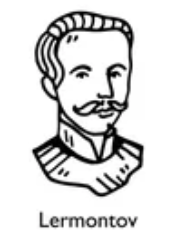

In [22]:
# Попробую открыть расшифрованый файл

Image.open("decrypted.png")

### Спасибо за внимание и да пребудет с вами сила!